In [1]:
import numpy as np
import matplotlib.pyplot as plt

df = np.load('../Data/LSTM_inference_data_1.npy')
df2 = np.load('../Data/LSTM_inference_data_2_8.npy')

df = np.swapaxes(df, 0, 1)
df2 = np.swapaxes(df2, 0, 1)

padded_df2 = np.zeros((5, 1, 10))
padded_df2[:3, :, :] = df2
df = np.concatenate((df, padded_df2), axis=1)
print(df.shape)



(5, 2, 10)


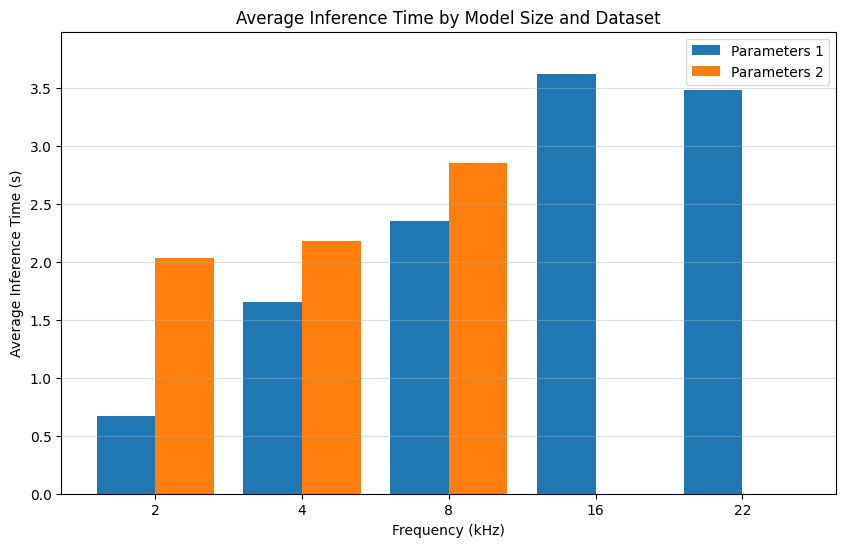

In [ ]:
KHZ = ['2', '4', '8', '16', '22']
plt.figure(figsize=(10, 6))

average_time = np.mean(df, axis=2)
x = np.arange(len(KHZ))

num_params = average_time.shape[1]
bar_width = 0.8 / num_params
offset = np.linspace(-(num_params-1)/2 * bar_width, (num_params-1)/2 * bar_width, num_params)

for i in range(num_params):
    plt.bar(x + offset[i], average_time[:, i], width=bar_width, label=f'Parameters {i+1}')

plt.xlabel('Frequency (kHz)')
plt.ylabel('Average Inference Time (s)')
plt.title('Average Inference Time by Model Size and Dataset')
plt.xticks(x, KHZ)
plt.ylim(0, max(np.max(average_time) * 1.1, 1.0))  # Dynamic y limit
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.savefig('../Images/LSTM_Inference_Model.png')
plt.show()